---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
!cat Employee_Movie_Choices.txt #see what's in the file

#Employee	Movie
Andy	Anaconda
Andy	Mean Girls
Andy	The Matrix
Claude	Anaconda
Claude	Monty Python and the Holy Grail
Claude	Snakes on a Plane
Frida	The Matrix
Frida	The Shawshank Redemption
Frida	The Social Network
Georgia	Anaconda
Georgia	Monty Python and the Holy Grail
Georgia	Snakes on a Plane
Joan	Forrest Gump
Joan	Kung Fu Panda
Joan	Mean Girls
Lee	Forrest Gump
Lee	Kung Fu Panda
Lee	Mean Girls
Pablo	The Dark Knight
Pablo	The Matrix
Pablo	The Shawshank Redemption
Vincent	The Godfather
Vincent	The Shawshank Redemption
Vincent	The Social Network


In [3]:
def answer_one():
    B = nx.Graph()
    
    B.add_nodes_from(employees, bipartite = 0)
    B.add_nodes_from(movies, bipartite=0)
    
    B = nx.read_adjlist('Employee_Movie_Choices.txt', delimiter = '\t', nodetype=str)
    
    
    return B# Your Answer Here

True


<IPython.core.display.Javascript object>


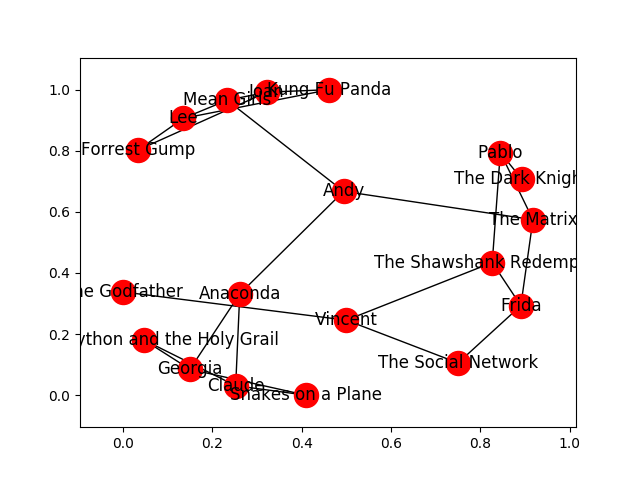

In [4]:
#check my answer
B = answer_one()
print(nx.is_bipartite(B))
plot_graph(B)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [5]:
def answer_two():
    B = answer_one()
    
    for node in movies: 
        B.node[node]['type'] = 'movie'
        
    for node in employees: 
        B.node[node]['type'] = 'employee'
    
    return B# Your Answer Here

In [74]:
#check my answer
B = answer_two()
B.node['Anaconda']['type']

'movie'

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [75]:
def answer_three():
    B = answer_two()
    bipartite.weighted_projected_graph(B, employees)
    
    return G# Your Answer Here

<IPython.core.display.Javascript object>


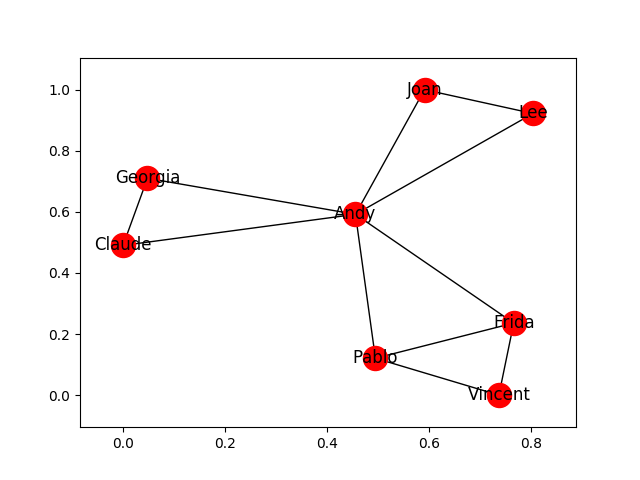

In [76]:
#check my answer
G = answer_three()
plot_graph(G)

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [72]:
def answer_four():
        
    R_df = pd.read_csv('Employee_Relationships.txt', delimiter = "\t", 
                   header=None, names=['n1', 'n2', 'r_weight'])
    
    df_list = []
    for row in R_df.values.tolist():
        weight = G.get_edge_data(row[0], row[1], default=0)
        if weight == 0: 
            row.append(weight)
        else: 
            row.append(weight['weight'])
        df_list.append(row)
    
    df = pd.DataFrame(data = df_list, columns = ['n1', 'n2', 'r_weight', 'm_weight'])
    
    corr = df['r_weight'].corr(df['m_weight'])
    return corr# Your Answer Here

In [73]:
corr = answer_four() #check my answer
print(corr)

0.788396222173
